## GRIP - The Sparks Foundation
### Data Science and Business Analytics Intern(June-21)
### Task-1 : Prediction using supervised ML Model
To Predict the percentage of marks of the student based on the number of hours they studied.
### Auther : Adarsha Sahoo

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Supressed warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Reading amd Understanding the data from remote url

In [2]:
#Load and read the data from url
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking the shape of the data
data.shape

(25, 2)

In [5]:
#  checking for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

- There is no missing values in the dataset

In [6]:
#Checking the columns and their Data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Checking for the descriptive statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 2. Exploratory Data Analysis

#### Outlier Treatment

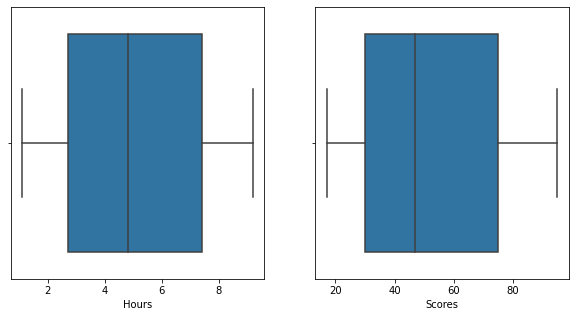

In [8]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(data['Hours'])
plt.subplot(1,2,2)
sns.boxplot(data['Scores'])
plt.show()

- From the above box plot we can see that there is no outliers in both the columns

#### Univariate Analysis

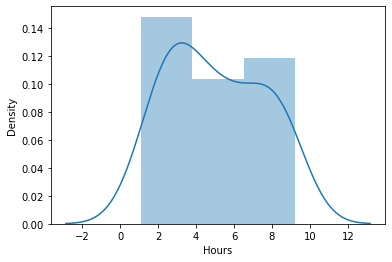

In [9]:
# Distribution of 'Hours'
sns.distplot(data['Hours'])
plt.show()

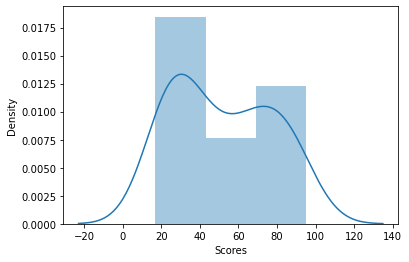

In [10]:
# Distribution of 'Score'
sns.distplot(data['Scores'])
plt.show()

#### Bivariate Analysis

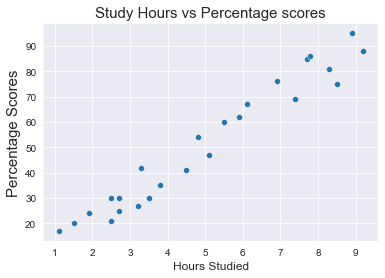

In [11]:
# plotting a scatterplot to represent the correlation
sns.set_style('darkgrid')
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Study Hours vs Percentage scores', size = 15)  
plt.xlabel('Hours Studied', size = 12)  
plt.ylabel('Percentage Scores', size = 15) 
plt.show()

- The above graph shows a clear positive linear correlation between Hours Studied and Percentage Scores.

In [12]:
# Finding correlation among the data infact this data set is very small
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


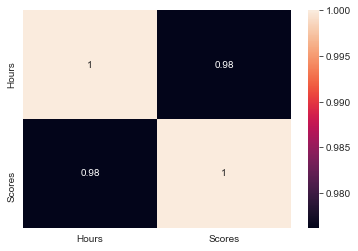

In [13]:
#correlation plot
correlation_matrix = data.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### 3. Data Preparation

In [14]:
X = data['Hours']
y = data['Scores']

In [15]:
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [16]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

### 4. Splitting the data into train and test

In [17]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [19]:
X_train.shape

(20, 1)

In [20]:
X_test.shape

(5, 1)

In [21]:
y_train.shape

(20,)

In [22]:
y_test.shape

(5,)

### 5. Linear Regression Model

In [23]:
# create an object of linear regression
lm = LinearRegression()

# fit the model
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
# see the params, make prediction(train test)
print(lm.coef_)
print(lm.intercept_)

[9.91065648]
2.018160041434683


#### Plotting the Line of Regressior

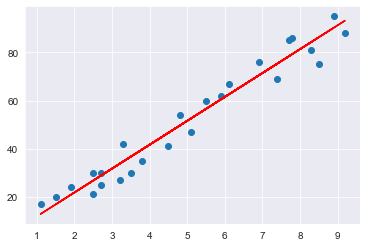

In [25]:
line_regressor = (lm.coef_)*X+lm.intercept_
plt.scatter(X,y)
plt.plot(X,line_regressor,color='red')
plt.show()

### 6. Prediction and Evaluation of Model

In [26]:
# Make prediction

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [27]:
# Actual VS Predict
Predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
Predictions

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [28]:
# r2 on train

r2_score(y_true = y_train, y_pred = y_train_pred)

0.9515510725211552

In [29]:
# r2 on test

r2_score(y_true = y_test, y_pred = y_test_pred)

0.9454906892105356

**Above 94% percentage indicates that above fitted Model is a GOOD MODEL.**

In [30]:
#Evaluation of the model

print(" Model RMSE: ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

 Model RMSE:  4.6474476121003665


#### What will be The Predicted Score , if a Student study for 9.25 Hours in a Day?

In [31]:
hrs=[[9.25]]
prediction=lm.predict(hrs)
print("Score for {} hours is {}".format(hrs[0][0],prediction[0]))

Score for 9.25 hours is 93.69173248737538


### Conclusion

- From the above result we can say that if a studied for 9.25 then the student will secured **93.69 marks.**

                                           END OF TASK